# Homework 3.2: Rational Quadratic Kernel

Use Rational Quadratic Kernel:
$$
K(x)=\left(1+\frac{x^2}{2 \alpha k^2}\right)^{-\alpha}
$$
and see how the regression changes with different hyper parameters $(\alpha, k)$.

Draw regression plots with different
hyper parameters and discuss their
effect on the regression.

## Answer

We plot the Rational Quadratic Kernel using the plotting function from the previous homework with different hyperparameters below and see the following effects:

Varying the parameter $\alpha$ controls the smoothness of the Kernel function: The smaller $\alpha$ is, the smoother (and flatter) the curve.

Varying the parameter $k$ also varies the smoothness of the Kernel function, now being completely flat for large $k$ and getting "pointier" the smaller $k$ gets.

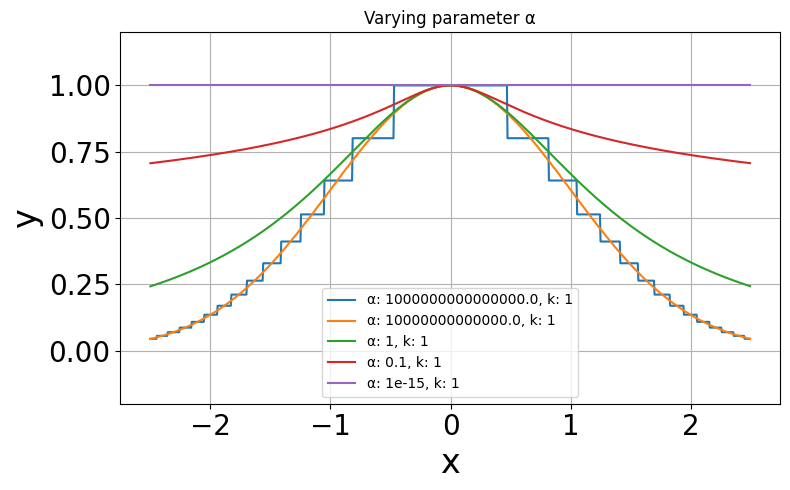

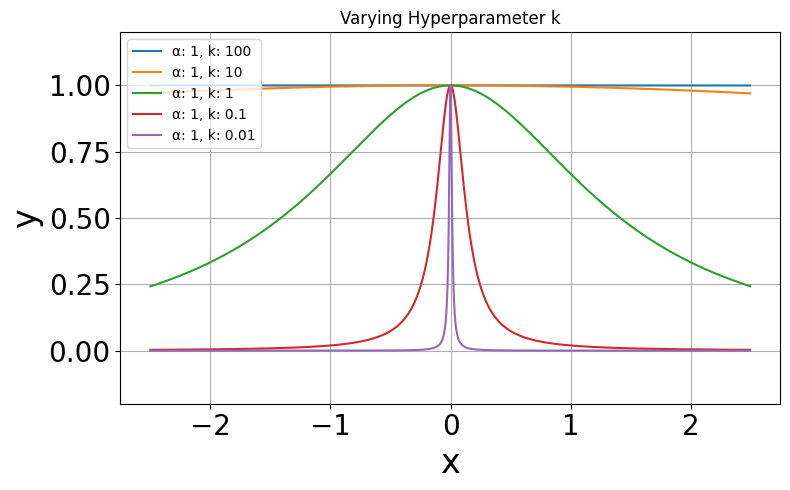

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def RationalQuadratic(x, dx, alpha, k):
  x_n = x # / dx normalize x 
  kernel = (1 + (x_n ** 2) / (2 * alpha * (k ** 2))) ** (-alpha)
  return kernel

def PlotKernel(kernel_fn, dx, alpha, k):
  # plot Kernel
  x_space = np.arange(-2.5, 2.5, 0.005)
  y_space = np.zeros_like(x_space)

  for idx, xii in enumerate(x_space):
    y_space[idx] = kernel_fn(xii, dx, alpha, k)
  label = "α: {}, k: {}".format(alpha,k)
  line, = ax.plot(x_space, y_space,  markersize=5, label=label)

dx = 0.5
fig, ax = plt.subplots(figsize = (8,5))
plt.title("Varying parameter α")
PlotKernel(RationalQuadratic, dx, alpha=1E15, k=1)
PlotKernel(RationalQuadratic, dx, alpha=1E13, k=1)
PlotKernel(RationalQuadratic, dx, alpha=1, k=1)
PlotKernel(RationalQuadratic, dx, alpha=1E-1, k=1)
PlotKernel(RationalQuadratic, dx, alpha=1E-15, k=1)
ax.legend()
ax.axes.tick_params(labelsize=20)
ax.set_xlabel("x", fontsize=24)
ax.set_ylabel("y", fontsize=24)
ax.set_ylim([-0.2,1.2])
ax.grid()
fig.tight_layout()

dx = 0.5
fig, ax = plt.subplots(figsize = (8,5))
plt.title("Varying Hyperparameter k")
PlotKernel(RationalQuadratic, dx, alpha=1, k=100)
PlotKernel(RationalQuadratic, dx, alpha=1, k=10)
PlotKernel(RationalQuadratic, dx, alpha=1, k=1)
PlotKernel(RationalQuadratic, dx, alpha=1, k=0.1)
PlotKernel(RationalQuadratic, dx, alpha=1, k=0.01)
ax.legend(loc=2)
ax.axes.tick_params(labelsize=20)
ax.set_xlabel("x", fontsize=24)
ax.set_ylabel("y", fontsize=24)
ax.set_ylim([-0.2,1.2])
ax.grid()
fig.tight_layout()

Since both parameters have a similar effect on the Kernel (they affect the bandwidth, though that particular term is usually used only for the Gaussian Kernel), we perform Kernel interpolation using the given diamond-carat dataset with varying $\alpha$ and $k$ and note, that as seen in the lecture, a smoother/wider Kernel (large $k$, small $\alpha$) will emphasize global trends, while a narrower/pointier Kernel (small $k$, large $\alpha$) will emphasize local trends.

On the extremes, a completely flat Kernel function results in the regression function just yielding the mean of all known points, while a completely narrow Kernel function yields an almost step-like function (i.e. nearest neighbour interpolation) .

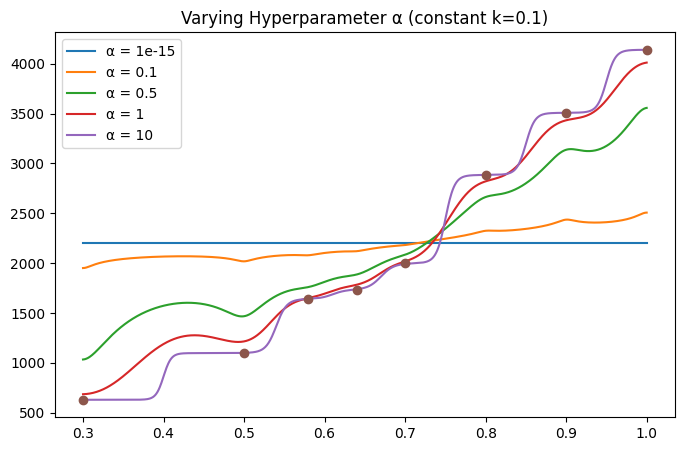

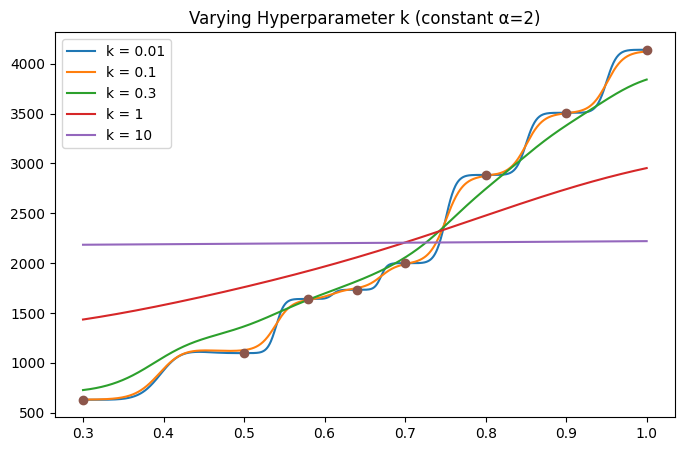

In [2]:
def RationalQuadratic(x, alpha, k):
  x_n = x # / dx normalize x 
  kernel = (1 + (x_n ** 2) / (2 * alpha * (k ** 2))) ** (-alpha)
  return kernel

def Regression(x, x_sample, y_sample, alpha, k):
  y = np.zeros_like(x)
  x_sample_norm = (x_sample - x_sample.mean()) / x_sample.std()
  x_norm = (x - x_sample.mean()) / x_sample.std()

  for idx, y_i in enumerate(y):
      kernel_sum = 0
      for x_sample_i, y_sample_i in zip(x_sample_norm, y_sample):
        y_i += y_sample_i*RationalQuadratic(x_norm[idx]-x_sample_i, alpha, k)
        kernel_sum += RationalQuadratic(x_norm[idx]-x_sample_i, alpha, k)
      y[idx] = y_i / kernel_sum
  return y

x_sample = np.array([0.3, 0.5, 0.58, 0.64, 0.7, 0.8, 0.9, 1.0])
y_sample = np.array([630, 1098, 1641, 1733, 2000, 2885, 3508, 4140])
x = np.linspace(x_sample.min(), x_sample.max(), num=1000)

fig, ax = plt.subplots(figsize = (8,5))
plt.title("Varying Hyperparameter α (constant k=0.1)")

for alpha in [1E-15,1E-1,0.5,1,10]:
  k = 0.1
  y = Regression(x,x_sample,y_sample, alpha, k)
  label = "α = {}".format(alpha)
  ax.plot(x, y, label = label)
ax.legend()
plt.plot(x_sample, y_sample, 'o')
plt.show()

fig, ax = plt.subplots(figsize = (8,5))
plt.title("Varying Hyperparameter k (constant α=2)")
for k in [.01,.1,.3,1,10]:
  alpha = 2
  y = Regression(x,x_sample,y_sample, alpha, k)
  label = "k = {}".format(k)
  ax.plot(x, y, label = label)
ax.legend()
plt.plot(x_sample, y_sample, 'o')
plt.show()
